In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv('credit.csv')
ds.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
ds.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
X = ds.loc[:,["CREDIT_LIMIT","MINIMUM_PAYMENTS"]].values
print(X)

[[1000.        139.509787]
 [7000.       1072.340217]
 [7500.        627.284787]
 ...
 [1000.         82.418369]
 [ 500.         55.755628]
 [1200.         88.288956]]


In [ ]:
from sklearn.impute import SimpleImputer
si1 = SimpleImputer(missing_values=np.nan,strategy='mean')
si1.fit(X)
X = si1.transform(X)

In [ ]:
X = pd.DataFrame(X,columns = ["CREDIT_LIMIT","MINIMUM_PAYMENTS"])
X.head()

,CREDIT_LIMIT,MINIMUM_PAYMENTS
0,1000.0,139.509787
1,7000.0,1072.340217
2,7500.0,627.284787
3,7500.0,864.206542
4,1200.0,244.791237


In [ ]:
ds =ds.drop(['CUST_ID','CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)

In [ ]:
ds = pd.concat([ds, X], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
ds = scaler.fit_transform(ds)
ds = normalize(ds)
print(ds)

[[-0.31193826 -0.10629684 -0.1810716  ...  0.15370408 -0.40928997
  -0.13251924]
 [ 0.21992533  0.03753859 -0.13122171 ...  0.10079608  0.19244815
   0.02495877]
 [ 0.12668203  0.14678317 -0.03050449 ...  0.10218749  0.23403927
  -0.02880315]
 ...
 [-0.1569743  -0.03932355 -0.085222   ... -0.87408185 -0.20362471
  -0.07112317]
 [-0.15431961 -0.03841074 -0.09724043 ... -0.85379209 -0.22735718
  -0.07184155]
 [-0.11520725 -0.17888144  0.00848011 ... -0.82953785 -0.18218754
  -0.06699181]]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
ds = pca.fit_transform(ds)
ds = pd.DataFrame(ds)
ds.columns = ['P1' , 'P2']

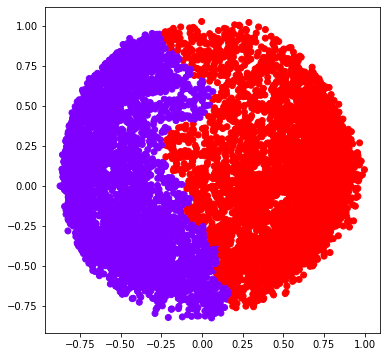

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac2 = AgglomerativeClustering(n_clusters = 2)

plt.figure(figsize =(6,6))
plt.scatter(ds['P1'],ds['P2'],
           c = ac2.fit_predict(ds), cmap = 'rainbow')
plt.show()

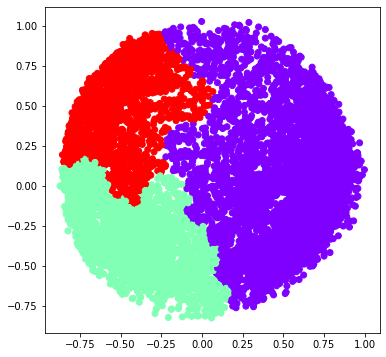

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6,6))
plt.scatter(ds['P1'],ds['P2'],
           c = ac3.fit_predict(ds), cmap = 'rainbow')
plt.show()

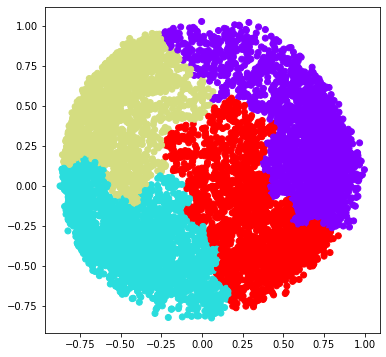

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6,6))
plt.scatter(ds['P1'],ds['P2'],
           c = ac4.fit_predict(ds), cmap = 'rainbow')
plt.show()